In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
path=r'D:\DataSets\Corona\World\reference_hospitalization_all_locs.csv'
path=path.replace('\\','/')
df=pd.read_csv(path,low_memory=False)


In [30]:
df=df.loc[df['location_name']=='Germany']
df=df[df['confirmed_infections_data_type']=='observed']
df_infec=df[['date','confirmed_infections','confirmed_infections_data_type']]

In [31]:
df_infec.set_index('date',inplace=True)


In [32]:
df_infec.index=pd.to_datetime(df_infec.index)

In [33]:
#Don´t forget to assign it, because it doesn´t have a inplace parameter
df_freq=df_infec.asfreq('D')

In [34]:
df_weekly=df_freq.resample('W').mean().round()
df_monthly=df_freq.resample('M').mean().round()
df_diff=df_freq['confirmed_infections'].diff()

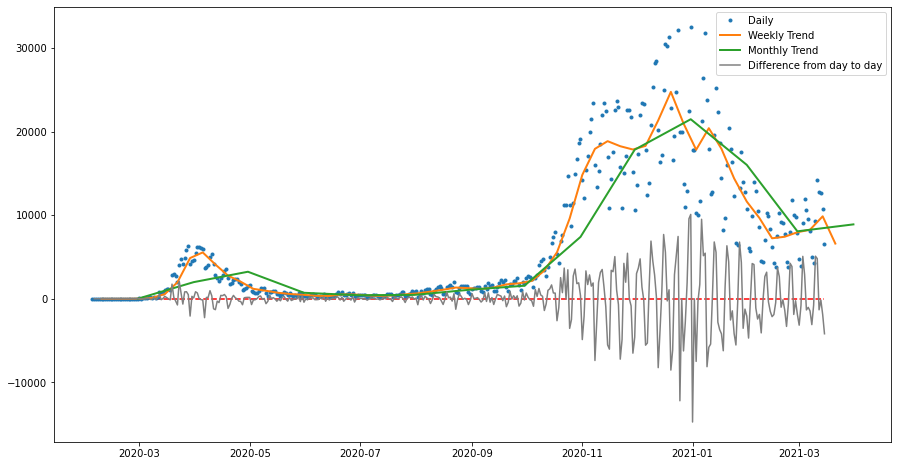

In [35]:
#Create the plot
fig,ax=plt.subplots(figsize=(15,8))

#Plot the total Data
ax.plot(df_freq['confirmed_infections'],
       marker='.',
       linestyle='None',
       markersize=6,
       label='Daily')

#adding the weekly
ax.plot(df_weekly['confirmed_infections'],
       linewidth=2,
       label='Weekly Trend')

#adding monthly treng
ax.plot(df_monthly['confirmed_infections'],
       linewidth=2,
       label='Monthly Trend')

ax.plot(df_diff,
       color='grey',
       label='Difference from day to day')

plt.hlines(y=0,
           xmin=df_freq.index.min(),
           xmax=df_freq.index.max(),
          linestyle='--',
          color='red'
          )

ax.legend()

<AxesSubplot:xlabel='date'>

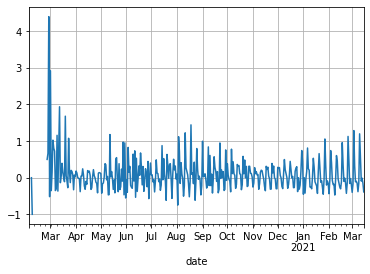

In [36]:
df_pct=df_freq['confirmed_infections'].pct_change()
df_pct.plot(grid=True)

In [37]:
df_freq.index.max()

Timestamp('2021-03-15 00:00:00', freq='D')